In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import feature_selection

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
dt_ois = pd.read_csv('detected_ois.csv')
dt_zps = pd.read_csv('detected.csv')

In [4]:
dt_zps.describe()

,id,NUMBER,FLUX_ISO,FLUXERR_ISO,MAG_ISO,MAGERR_ISO,FLUX_APER,FLUXERR_APER,MAG_APER,MAGERR_APER,...,ELONGATION,ELLIPTICITY,CLASS_STAR,DELTAX,DELTAY,RATIO,ROUNDNESS,PEAK_CENTROID,IS_REAL,image_id
count,5838.000000,5838.000000,5838.000000,5838.000000,5838.000000,5838.000000,5838.000000,5838.000000,5838.000000,5838.000000,...,5838.000000,5838.000000,5838.000000,5838.000000,5838.000000,5838.000000,5838.000000,5838.000000,5838.000000,5838.000000
mean,2919.500000,20.407503,232.718613,4.933950,19.620300,0.045051,177.604591,4.386045,20.430145,0.915413,...,1.358197,0.183979,0.009907,4.993662,5.035115,0.857854,1.358186,0.365341,0.758479,74.365536
std,1685.429767,11.699404,225.135105,1.603044,1.134334,0.030443,161.520348,0.012731,7.076475,10.062576,...,0.595540,0.198839,0.031194,2.262792,2.295529,0.189456,0.595490,0.572089,0.428042,42.595334
min,1.000000,1.000000,14.313840,2.206314,17.444400,0.008600,-174.242600,4.082117,17.924100,0.007000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.002502,0.000000,1.000000
25%,1460.250000,10.000000,62.018992,3.566950,18.676275,0.020200,56.932735,4.378207,18.967525,0.018400,...,1.041000,0.039000,0.000000,3.000000,3.000000,0.750000,1.040776,0.127261,1.000000,37.000000
50%,2919.500000,20.000000,139.778650,4.846027,19.636400,0.037500,107.536950,4.387856,19.921100,0.044300,...,1.094000,0.086000,0.000000,5.000000,5.000000,1.000000,1.093534,0.195534,1.000000,75.000000
75%,4378.750000,30.000000,338.450950,6.270634,20.518725,0.061900,258.812125,4.394845,20.611600,0.083600,...,1.378000,0.274750,0.011000,6.000000,6.000000,1.000000,1.378206,0.371515,1.000000,111.000000
max,5838.000000,51.000000,1052.567000,12.069120,22.110600,0.168100,676.673000,4.414752,99.000000,379.804400,...,9.157000,0.891000,0.961000,25.000000,46.000000,1.000000,9.153398,11.607899,1.000000,148.000000


In [5]:
dt_ois.describe()

,id,NUMBER,FLUX_ISO,FLUXERR_ISO,MAG_ISO,MAGERR_ISO,FLUX_APER,FLUXERR_APER,MAG_APER,MAGERR_APER,...,ELONGATION,ELLIPTICITY,CLASS_STAR,DELTAX,DELTAY,RATIO,ROUNDNESS,PEAK_CENTROID,IS_REAL,image_id
count,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,...,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000
mean,3866.500000,26.726332,14007.620530,268.052815,15.271861,0.044555,10793.237151,249.587182,15.515458,0.149138,...,1.408579,0.210369,0.025891,4.732799,4.723487,0.892787,1.408566,0.313492,0.630885,74.729953
std,2232.180474,15.257641,15903.228204,99.376982,1.182488,0.029084,11477.871061,3.870203,2.720216,2.976346,...,0.545490,0.212989,0.113078,2.142690,2.163024,0.155799,0.545463,0.369906,0.482596,42.652883
min,1.000000,1.000000,824.957300,125.566500,12.777800,0.006800,-1419.362000,185.412800,13.252200,0.005400,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.001628,0.000000,1.000000
25%,1933.750000,14.000000,3332.223750,186.486950,14.317625,0.019700,3008.067500,249.325200,14.592850,0.018675,...,1.040000,0.039000,0.000000,3.000000,3.000000,0.800000,1.040205,0.086601,0.000000,38.000000
50%,3866.500000,27.000000,6531.447500,245.783300,15.462450,0.042500,5223.698500,249.858000,15.705050,0.051900,...,1.115000,0.103000,0.000000,4.000000,4.000000,1.000000,1.115265,0.159980,1.000000,74.500000
75%,5799.250000,40.000000,18748.400000,352.552175,16.193175,0.061400,14549.897500,250.355900,16.304300,0.090125,...,1.640500,0.390250,0.025000,6.000000,6.000000,1.000000,1.641423,0.439853,1.000000,112.000000
max,7732.000000,59.000000,77424.210000,675.244700,17.708900,0.165500,50018.250000,254.346400,99.000000,99.000000,...,5.316000,0.812000,0.976000,18.000000,22.000000,1.000000,5.312834,8.516805,1.000000,148.000000


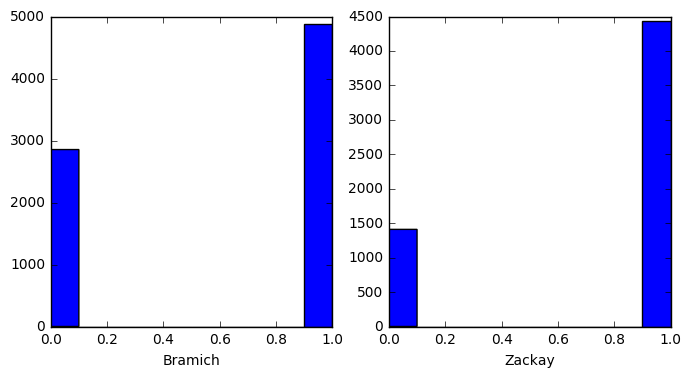

In [13]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(dt_ois['IS_REAL'])
plt.xlabel('Bramich')
plt.subplot(122)
plt.hist(dt_zps['IS_REAL'])
plt.xlabel('Zackay')

In [144]:
dt_ois.columns

Index([u'id', u'NUMBER', u'FLUX_ISO', u'FLUXERR_ISO', u'MAG_ISO',
       u'MAGERR_ISO', u'FLUX_APER', u'FLUXERR_APER', u'MAG_APER',
       u'MAGERR_APER', u'FLUX_AUTO', u'FLUXERR_AUTO', u'MAG_AUTO',
       u'MAGERR_AUTO', u'BACKGROUND', u'THRESHOLD', u'FLUX_MAX', u'XMIN_IMAGE',
       u'YMIN_IMAGE', u'XMAX_IMAGE', u'YMAX_IMAGE', u'XPEAK_IMAGE',
       u'YPEAK_IMAGE', u'X_IMAGE', u'Y_IMAGE', u'X2_IMAGE', u'Y2_IMAGE',
       u'XY_IMAGE', u'CXX_IMAGE', u'CYY_IMAGE', u'CXY_IMAGE', u'A_IMAGE',
       u'B_IMAGE', u'THETA_IMAGE', u'MU_MAX', u'FLAGS', u'FWHM_IMAGE',
       u'ELONGATION', u'ELLIPTICITY', u'CLASS_STAR', u'DELTAX', u'DELTAY',
       u'RATIO', u'ROUNDNESS', u'PEAK_CENTROID', u'IS_REAL', u'image_id'],
      dtype='object')

In [159]:
d_ois = dt_ois[[ u'FLUX_ISO', u'FLUXERR_ISO', u'MAG_ISO',
       u'MAGERR_ISO', u'FLUX_APER', u'FLUXERR_APER', u'MAG_APER',
       u'MAGERR_APER', u'FLUX_AUTO', u'FLUXERR_AUTO', u'MAG_AUTO',
       u'MAGERR_AUTO', u'BACKGROUND', u'THRESHOLD', u'FLUX_MAX', u'X2_IMAGE', u'Y2_IMAGE',
       u'XY_IMAGE', u'CXX_IMAGE', u'CYY_IMAGE', u'CXY_IMAGE', u'A_IMAGE',
       u'B_IMAGE', u'THETA_IMAGE', u'MU_MAX', u'FLAGS', u'FWHM_IMAGE',
       u'ELONGATION', u'ELLIPTICITY', u'CLASS_STAR', u'DELTAX', u'DELTAY',
       u'RATIO', u'ROUNDNESS', u'PEAK_CENTROID']]

In [160]:
d_zps = dt_zps[[ u'FLUX_ISO', u'FLUXERR_ISO', u'MAG_ISO',
       u'MAGERR_ISO', u'FLUX_APER', u'FLUXERR_APER', u'MAG_APER',
       u'MAGERR_APER', u'FLUX_AUTO', u'FLUXERR_AUTO', u'MAG_AUTO',
       u'MAGERR_AUTO', u'BACKGROUND', u'THRESHOLD', u'FLUX_MAX', u'X2_IMAGE', u'Y2_IMAGE',
       u'XY_IMAGE', u'CXX_IMAGE', u'CYY_IMAGE', u'CXY_IMAGE', u'A_IMAGE',
       u'B_IMAGE', u'THETA_IMAGE', u'MU_MAX', u'FLAGS', u'FWHM_IMAGE',
       u'ELONGATION', u'ELLIPTICITY', u'CLASS_STAR', u'DELTAX', u'DELTAY',
       u'RATIO', u'ROUNDNESS', u'PEAK_CENTROID']]

In [180]:
len(d_zps.columns)

35

In [182]:
X_zps = d_zps.as_matrix()
X_ois = d_ois.as_matrix()

In [183]:
scaler_ois = preprocessing.StandardScaler().fit(X_ois)
scaler_zps = preprocessing.StandardScaler().fit(X_zps)

In [184]:
X_ois_scaled = scaler_ois.transform(X_ois)
X_zps_scaled = scaler_zps.transform(X_zps)

## Feature selection

In [158]:
svc = svm.SVC(kernel='linear')

In [230]:
c45 = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

In [231]:
Y_ois = dt_ois['IS_REAL']
Y_zps = dt_zps['IS_REAL']

In [232]:
rfecv = feature_selection.RFECV(estimator=c45, step=1, cv=StratifiedKFold(6),
              scoring='f1')
rfecv.fit(X_ois_scaled, Y_ois)

RFECV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
   estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
   n_jobs=1, scoring='f1', step=1, verbose=0)

In [233]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 6


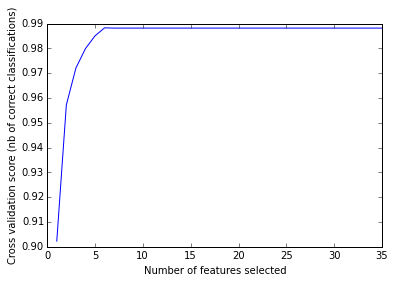

In [234]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [235]:
dB = d_ois[d_ois.columns[np.where(rfecv.ranking_==1)[0]]]

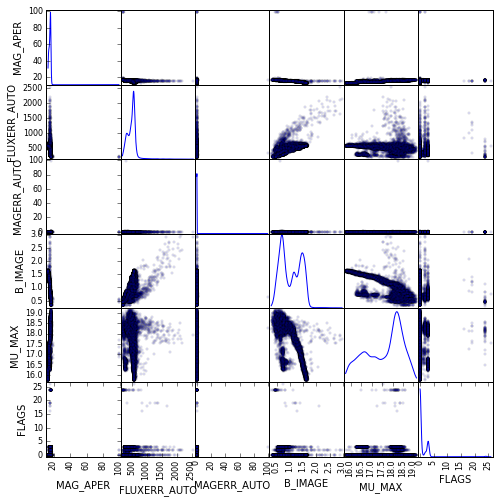

In [236]:
scatter_matrix(dB, alpha=0.1, figsize=(8, 8), diagonal='kde')
plt.show()

In [237]:
rfecv = feature_selection.RFECV(estimator=c45, step=1, cv=StratifiedKFold(6),
              scoring='f1')
rfecv.fit(X_zps_scaled, Y_zps)

RFECV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
   estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
   n_jobs=1, scoring='f1', step=1, verbose=0)

In [238]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 4


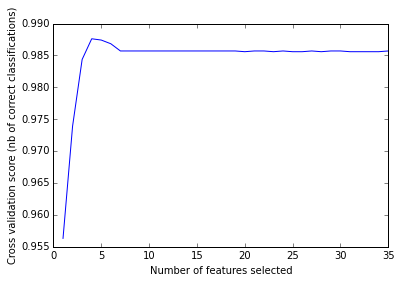

In [239]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [240]:
dZ = d_zps[d_zps.columns[np.where(rfecv.ranking_==1)[0]]]

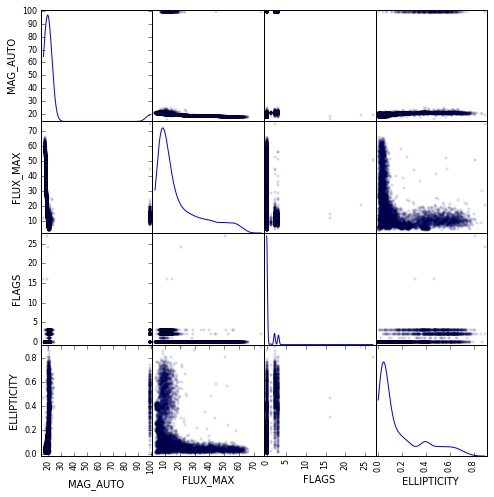

In [241]:
scatter_matrix(dZ, alpha=0.1, figsize=(8, 8), diagonal='kde')
plt.show()

### Principal Component Analysis

Repeat the scaling pre processing

In [242]:
X_zps = dZ.as_matrix()
X_ois = dB.as_matrix()

In [243]:
scaler_ois = preprocessing.StandardScaler().fit(X_ois)
scaler_zps = preprocessing.StandardScaler().fit(X_zps)

In [244]:
X_ois_scaled = scaler_ois.transform(X_ois)
X_zps_scaled = scaler_zps.transform(X_zps)

In [245]:
pca = decomposition.PCA()

In [246]:
pca.fit(X_ois_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [247]:
X_ois_t = pca.transform(X_ois_scaled)

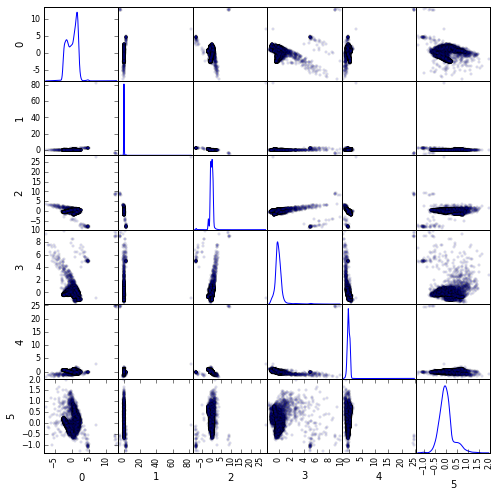

In [249]:
scatter_matrix(pd.DataFrame(X_ois_t), alpha=0.1, figsize=(8, 8), diagonal='kde')
plt.show()

In [127]:
Y = d['IS_REAL'].as_matrix()

### Support vector machines

In [138]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
skf = StratifiedKFold(n_splits=6)
predictions = np.array([])
y_testing = np.array([])
for train, test in skf.split(X_transformed, Y):
    clf = svm.LinearSVC()
    
    x_train = X_transformed[train]
    y_train = Y[train]
    clf.fit(x_train, y_train)
    
    x_test = X_transformed[test]
    y_test = Y[test]
    pr = clf.predict(x_test)
    
    predictions = np.hstack([predictions, pr])
    y_testing = np.hstack([y_testing, y_test])

print metrics.classification_report(y_testing, predictions)

             precision    recall  f1-score   support

        0.0       0.97      0.91      0.94      2854
        1.0       0.95      0.99      0.97      4878

avg / total       0.96      0.96      0.96      7732



In [129]:
from sklearn.tree import DecisionTreeClassifier

### Decision tree (gini)

In [130]:
skf = StratifiedKFold(n_splits=6)
predictions = np.array([])
y_testing = np.array([])
for train, test in skf.split(X_transformed, Y):
    clf = DecisionTreeClassifier()
    
    x_train = X_transformed[train]
    y_train = Y[train]
    clf.fit(x_train, y_train)
    
    x_test = X_transformed[test]
    y_test = Y[test]
    pr = clf.predict(x_test)
    
    predictions = np.hstack([predictions, pr])
    y_testing = np.hstack([y_testing, y_test])

print metrics.classification_report(y_testing, predictions)

             precision    recall  f1-score   support

        0.0       0.97      0.97      0.97      2854
        1.0       0.98      0.98      0.98      4878

avg / total       0.98      0.98      0.98      7732



In [131]:
from sklearn.ensemble import RandomForestClassifier

### Random forest

In [132]:
skf = StratifiedKFold(n_splits=6)
predictions = np.array([])
y_testing = np.array([])
for train, test in skf.split(X_transformed, Y):
    clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5)
    
    x_train = X_transformed[train]
    y_train = Y[train]
    clf.fit(x_train, y_train)
    
    x_test = X_transformed[test]
    y_test = Y[test]
    pr = clf.predict(x_test)
    
    predictions = np.hstack([predictions, pr])
    y_testing = np.hstack([y_testing, y_test])

print metrics.classification_report(y_testing, predictions)

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98      2854
        1.0       0.99      0.99      0.99      4878

avg / total       0.99      0.99      0.99      7732



### DecisionTreeClassifier (C45)

In [133]:
skf = StratifiedKFold(n_splits=6)
predictions = np.array([])
y_testing = np.array([])
for train, test in skf.split(X_transformed, Y):
    clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)
    
    x_train = X_transformed[train]
    y_train = Y[train]
    clf.fit(x_train, y_train)
    
    x_test = X_transformed[test]
    y_test = Y[test]
    pr = clf.predict(x_test)
    
    predictions = np.hstack([predictions, pr])
    y_testing = np.hstack([y_testing, y_test])

print metrics.classification_report(y_testing, predictions)

             precision    recall  f1-score   support

        0.0       0.93      0.96      0.94      2854
        1.0       0.98      0.96      0.97      4878

avg / total       0.96      0.96      0.96      7732



In [134]:
clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)
clf.fit(X_transformed, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [135]:
from sklearn.tree import export_graphviz

In [136]:
export_graphviz(clf, 'tree.dot')